## Convolutional Neural Networks

## Installs:

In [1]:
# % pip install torch
# % pip install sklearning

## Imports:

In [2]:
# Pytorch
import torch
from torchvision import datasets # Dataset Pytorch
from torchvision import transforms # Transforms data in tensor

# Numpy
import numpy as np

# Matiplotlib
import matplotlib.pyplot as plt
from matplotlib import patches
%matplotlib inline

# Scipy
from scipy.signal import convolve

# Skimage
from skimage import data as data_sk
from skimage import io
from skimage import color
from skimage import transform as T

## Loading classification datasets

In [3]:
MNIST = datasets.MNIST(
    '.',
    train = False,
    transform = transforms.ToTensor(),
    download = True
)

100%|██████████| 9912422/9912422 [00:00<00:00, 176993989.95it/s]


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 16127771.78it/s]


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 97793964.80it/s]

Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 12394618.59it/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



In [4]:
data, label = MNIST[0]

In [5]:
# Type data and label
print(type(data), type(label))

<class 'torch.Tensor'> <class 'int'>


In [6]:
# Size data and label
print(data.size(), label)

torch.Size([1, 28, 28]) 7


## Plotting samples from the dataset

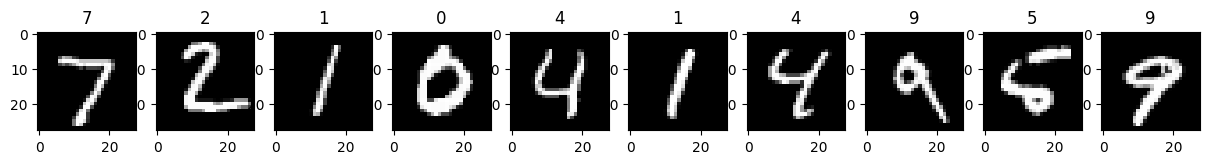

In [7]:
## Plotting

fig, axs = plt.subplots(1, 10, figsize = (15, 4))
for i in range(10):
    data, label = MNIST[i]
    axs[i].imshow(data[0], cmap = 'gray')
    axs[i].set_title(str(label))

## Detection

## Pascoal Labels

In [8]:
VOC = datasets.VOCDetection(
    '.',
    image_set = 'train',
    download = True,
    transform = transforms.ToTensor()
)

100%|██████████| 1999639040/1999639040 [00:58<00:00, 34241906.74it/s]


Extracting ./VOCtrainval_11-May-2012.tar to .


In [9]:
# Split label x data
data, label = VOC[0]

In [10]:
# Type data and label
print(type(data), type(label))

<class 'torch.Tensor'> <class 'dict'>


In [11]:
# Size data and label
print(data.size, label)

<built-in method size of Tensor object at 0x78043cbd39c0> {'annotation': {'folder': 'VOC2012', 'filename': '2008_000008.jpg', 'source': {'database': 'The VOC2008 Database', 'annotation': 'PASCAL VOC2008', 'image': 'flickr'}, 'size': {'width': '500', 'height': '442', 'depth': '3'}, 'segmented': '0', 'object': [{'name': 'horse', 'pose': 'Left', 'truncated': '0', 'occluded': '1', 'bndbox': {'xmin': '53', 'ymin': '87', 'xmax': '471', 'ymax': '420'}, 'difficult': '0'}, {'name': 'person', 'pose': 'Unspecified', 'truncated': '1', 'occluded': '0', 'bndbox': {'xmin': '158', 'ymin': '44', 'xmax': '289', 'ymax': '167'}, 'difficult': '0'}]}}


In [12]:
# Permute
data = data.permute(1, 2, 0)

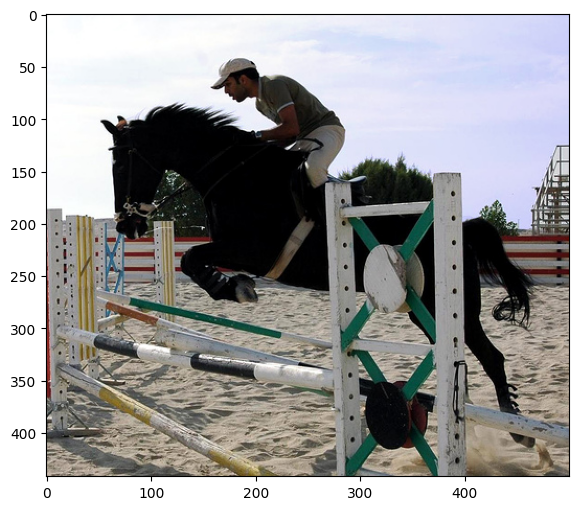

In [13]:
# Visualizing
plt.figure(figsize = (8, 6))
plt.imshow(data)

In [14]:
# Label
label

{'annotation': {'folder': 'VOC2012',
  'filename': '2008_000008.jpg',
  'source': {'database': 'The VOC2008 Database',
   'annotation': 'PASCAL VOC2008',
   'image': 'flickr'},
  'size': {'width': '500', 'height': '442', 'depth': '3'},
  'segmented': '0',
  'object': [{'name': 'horse',
    'pose': 'Left',
    'truncated': '0',
    'occluded': '1',
    'bndbox': {'xmin': '53', 'ymin': '87', 'xmax': '471', 'ymax': '420'},
    'difficult': '0'},
   {'name': 'person',
    'pose': 'Unspecified',
    'truncated': '1',
    'occluded': '0',
    'bndbox': {'xmin': '158', 'ymin': '44', 'xmax': '289', 'ymax': '167'},
    'difficult': '0'}]}}

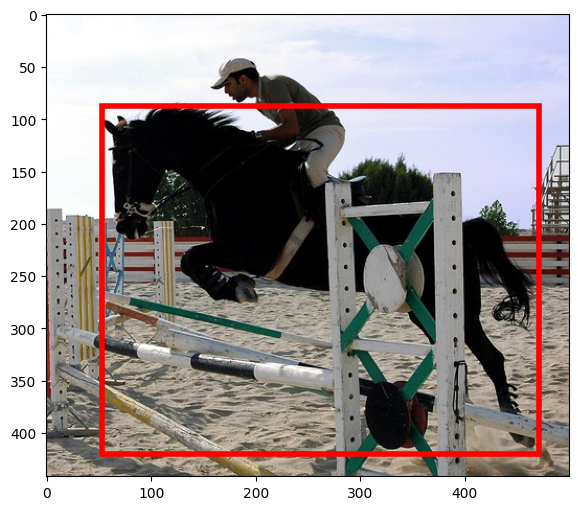

In [15]:
# Box
bbox = label['annotation']['object'][0]['bndbox']
xmax = int(bbox['xmax'])
xmin = int(bbox['xmin'])
ymax = int(bbox['ymax'])
ymin = int(bbox['ymin'])

fig, ax = plt.subplots(figsize=(8, 6))
ax.imshow(data)

w, h = xmax-xmin, ymax-ymin
rect = patches.Rectangle((xmin, ymin), w, h, fill = False, color = 'r', linewidth = 4)
ax.add_patch(rect)
plt.show()

## Segmentation

* Defines the pixel mask where the object is

In [16]:
VOCS = datasets.VOCSegmentation(
    '.',
    year  ='2012',
    image_set = 'val',
    download = False,
    transform = transforms.ToTensor(),
    target_transform = transforms.ToTensor()
)

In [17]:
# Spliting data and label
data, label = VOCS[0]

In [18]:
# Type data and label
print(type(data), type(label))

<class 'torch.Tensor'> <class 'torch.Tensor'>


In [19]:
# Size data and label
print(data.size(), label.size())

torch.Size([3, 366, 500]) torch.Size([1, 366, 500])


In [20]:
# Permute
data = data.permute(1, 2, 0)

In [21]:
data.size()

torch.Size([366, 500, 3])

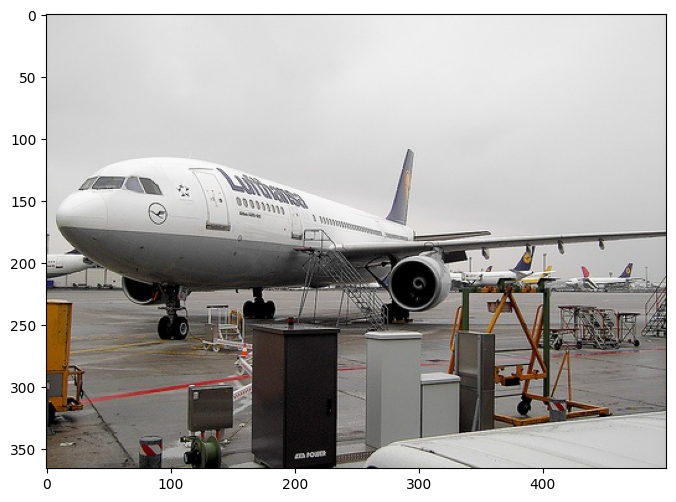

In [22]:
# Plotting data
plt.figure(figsize = (8, 6))
plt.imshow(data)

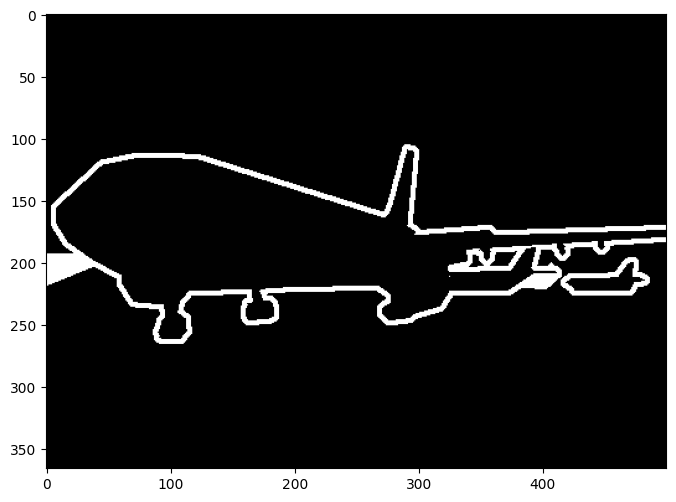

In [23]:
# Plotting label
plt.figure(figsize = (8, 6))
plt.imshow(label[0], cmap = 'gray')

## 1D Convolution

In [24]:
np.random.seed(3) # Defining seed
X = np.linspace(0, 100, 100)
y = 10 * np.sin(X) * np.random.rand(X.shape[0])

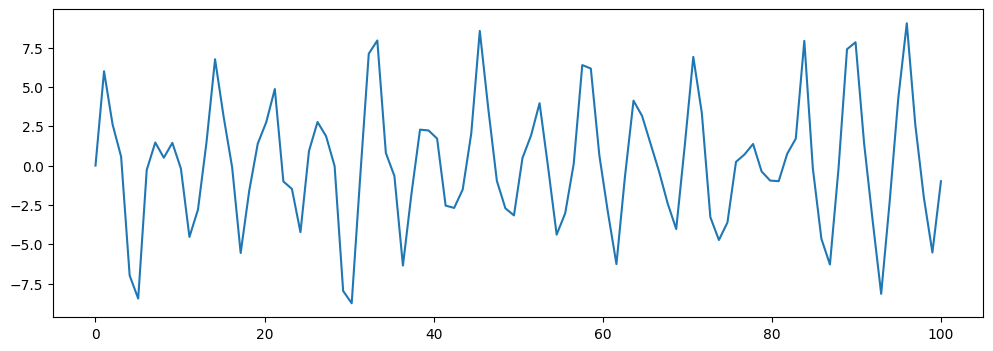

In [25]:
plt.figure(figsize = (12, 4))
plt.plot(X, y)

In [26]:
# Function to view the kernel
def show_1D(values, title):
    plt.figure(figsize = (len(values), 2))
    plt.imshow(values[np.newaxis, :], cmap = 'gray')

    for k, s in enumerate(values):
        plt.text(k, 0, f'{s:.1f}', fontsize = 16, color = 'red', ha = 'center', va = 'center')
    plt.title(title, fontsize = 18)
    plt.yticks([])

In [27]:
signal = y[5 : 15]

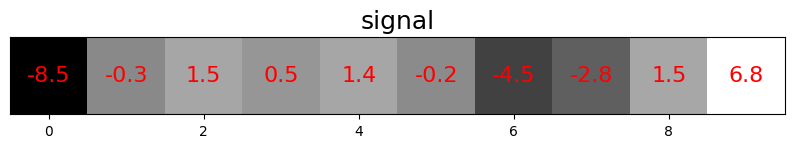

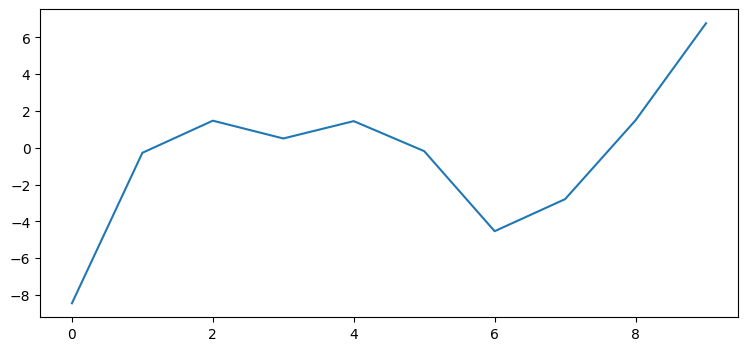

In [28]:
show_1D(signal, 'signal')
plt.figure(figsize = (9, 4))
plt.plot(signal)

## Kernel

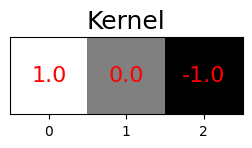

In [29]:
# Kernel
kernel = np.array([1, 0, -1])
show_1D(kernel , 'Kernel')

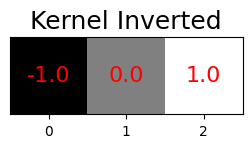

In [30]:
# Kernel_inverted
kernel_inverted = np.flip(kernel)
show_1D(kernel_inverted, 'Kernel Inverted')

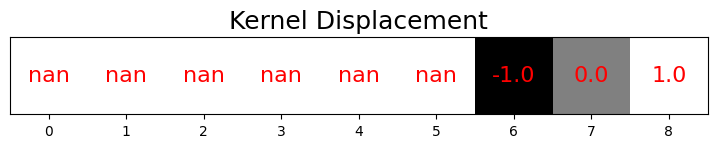

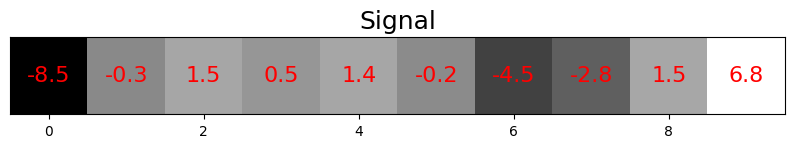

In [31]:
# Displacement
u = 6
displacement = [float ('NAN')] * u
kernel_displacement = np.hstack((displacement, kernel_inverted))

show_1D(kernel_displacement, 'Kernel Displacement')
show_1D(signal, 'Signal')

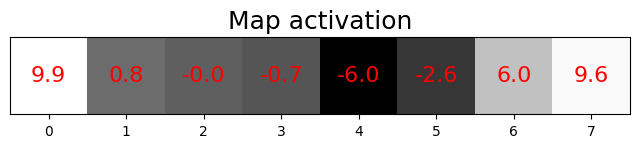

In [32]:
activation = convolve(signal, kernel, mode = 'valid')
show_1D(activation, 'Map activation')

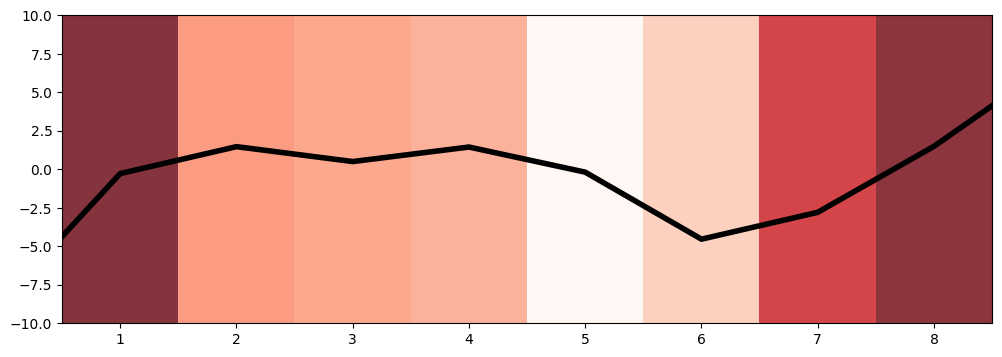

In [33]:
plt.figure(figsize = (12, 4))
plt.plot(signal, color = 'k', linewidth = 4)
plt.imshow(activation[np.newaxis, :], cmap = 'Reds', aspect = 'auto', alpha = 0.8, extent = (0.5, 8.5 , -10, 10))

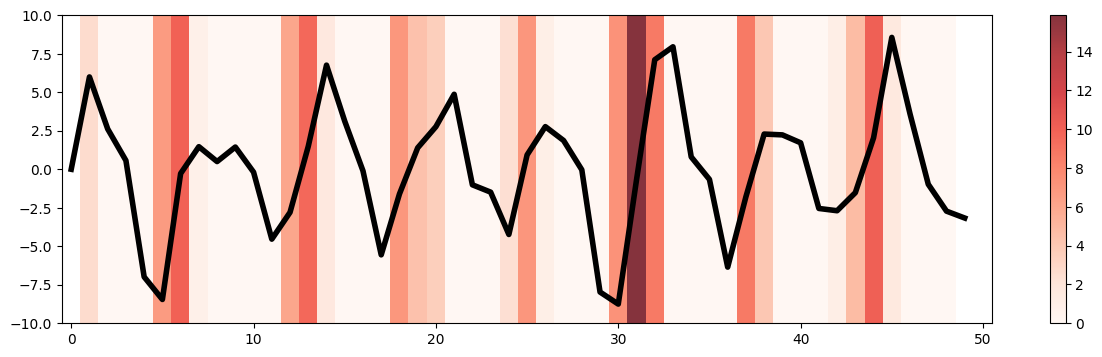

In [34]:
activation = convolve(y[: 50], kernel, mode = 'valid')
activation[activation < 0 ] = 0

plt.figure(figsize = (15, 4))
plt.plot(y[: 50], color = 'k', linewidth = 4)
plt.imshow(activation[np.newaxis, :], cmap = 'Reds', aspect = 'auto', alpha = 0.8, extent = (0.5, 48.5, -10, 10))
plt.xlim(-0.5, 50.5)
plt.colorbar()

## 2D Convolution

In [35]:
img = data_sk.brick()

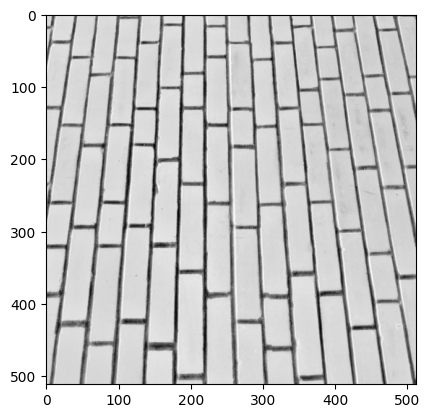

In [36]:
# Vizializing
plt.imshow(img, cmap = 'Greys')

In [37]:
def show_2D(values, title):
    plt.figure(figsize = (len(values), len(values)))
    plt.imshow(values, cmap = 'gray')
    for i, line in enumerate(values):
        for j, col in enumerate(line):
            plt.text(j, i, f'{col}', fontsize = 16, color = 'red', ha  = 'center', va = 'center')
    plt.title(title)
    plt.xticks([])
    plt.yticks([])
    plt.savefig(title + '.png', format='png', dpi = 100, bbox_inches = 'tight')

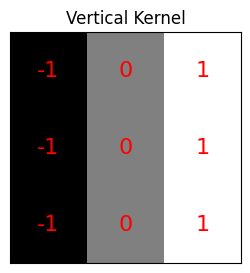

In [38]:
# Vertical Kernel
kernel_v = [[-1, 0, 1],
            [-1, 0, 1],
            [-1, 0, 1]]
show_2D(kernel_v, 'Vertical Kernel')

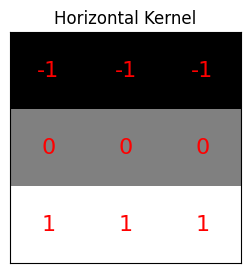

In [39]:
# Horizontal Kernel
kernel_h = [[-1, -1, -1],
            [0, 0, 0],
            [1, 1, 1]]
show_2D(kernel_h, 'Horizontal Kernel')

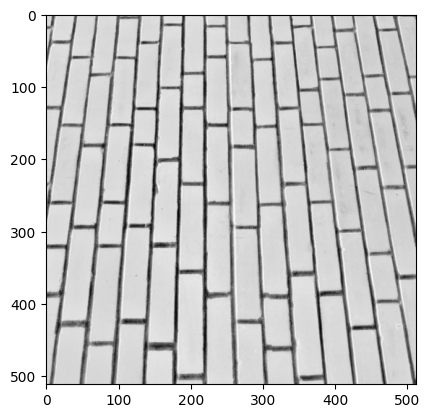

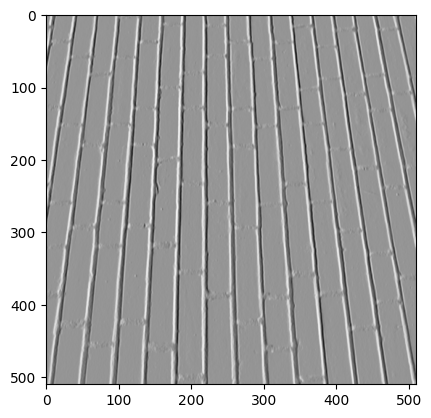

In [40]:
feature_map = convolve(img, kernel_v, mode = 'valid')
plt.imshow(img, cmap = 'Greys')

plt.figure()
plt.imshow(feature_map, cmap = 'Greys')

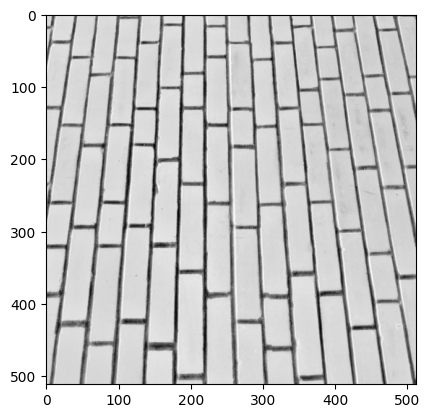

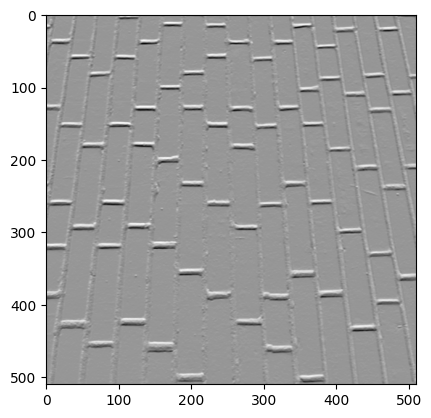

In [41]:
feature_map = convolve(img, kernel_h, mode = 'valid')
plt.imshow(img, cmap = 'Greys')

plt.figure()
plt.imshow(feature_map, cmap = 'Greys')

## Covolutional filters

In [42]:
def show(img, kernel, result, title):
    fig, axs  = plt.subplots(1, 3, figsize = (15, 15))
    plot = [img, kernel, result]
    titles = ['image', title, 'Activation Map']
    for k, ax in enumerate(axs):
        ax.imshow(plot[k], cmap = 'gray')
        ax.set_yticks([])
        ax.set_xticks([])
        ax.set_title(titles[k])

    for i, line in enumerate(kernel):
        for j, col in enumerate(line):
            axs[1].text(j, i, '{:.2f}'.format(col), fontsize = 12, color = 'red', ha = 'center', va = 'center')

In [43]:
! wget https://s3.us-east-1.amazonaws.com/jarvis-caelum/GUI.jpg

--2024-04-15 19:42:06--  https://s3.us-east-1.amazonaws.com/jarvis-caelum/GUI.jpg
Resolving s3.us-east-1.amazonaws.com (s3.us-east-1.amazonaws.com)... 52.216.214.0, 54.231.229.40, 16.182.97.64, ...
Connecting to s3.us-east-1.amazonaws.com (s3.us-east-1.amazonaws.com)|52.216.214.0|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 82709 (81K) [image/jpeg]
Saving to: ‘GUI.jpg’

GUI.jpg             100%[===================>]  80.77K  --.-KB/s    in 0.006s  

2024-04-15 19:42:07 (13.4 MB/s) - ‘GUI.jpg’ saved [82709/82709]



In [44]:
# Loading image
img  = io.imread('GUI.jpg')

In [45]:
# Size image
img.shape

(360, 330, 3)

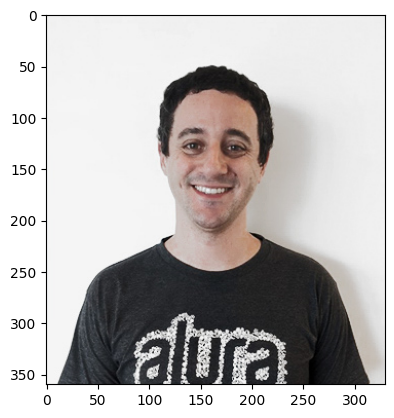

In [46]:
plt.imshow(img)

In [47]:
img = img[:, :, 0]

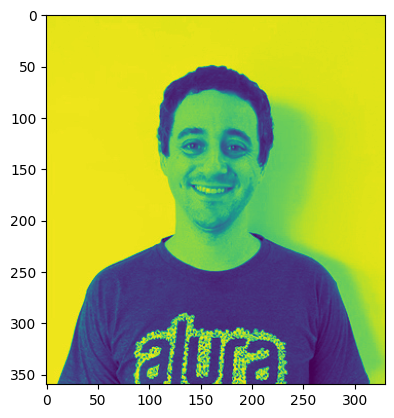

In [48]:
plt.imshow(img)

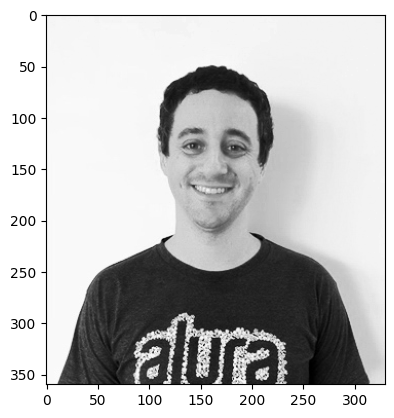

In [49]:
plt.imshow(img, cmap = 'gray')

## Mean Filters

In [50]:
# Kernel 3D at zeros
kernel_men = np.zeros((9, 9))
kernel_men

array([[0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [51]:
kernel_men[:] = 1 / (9 ** 2)
kernel_men

array([[0.01234568, 0.01234568, 0.01234568, 0.01234568, 0.01234568,
        0.01234568, 0.01234568, 0.01234568, 0.01234568],
       [0.01234568, 0.01234568, 0.01234568, 0.01234568, 0.01234568,
        0.01234568, 0.01234568, 0.01234568, 0.01234568],
       [0.01234568, 0.01234568, 0.01234568, 0.01234568, 0.01234568,
        0.01234568, 0.01234568, 0.01234568, 0.01234568],
       [0.01234568, 0.01234568, 0.01234568, 0.01234568, 0.01234568,
        0.01234568, 0.01234568, 0.01234568, 0.01234568],
       [0.01234568, 0.01234568, 0.01234568, 0.01234568, 0.01234568,
        0.01234568, 0.01234568, 0.01234568, 0.01234568],
       [0.01234568, 0.01234568, 0.01234568, 0.01234568, 0.01234568,
        0.01234568, 0.01234568, 0.01234568, 0.01234568],
       [0.01234568, 0.01234568, 0.01234568, 0.01234568, 0.01234568,
        0.01234568, 0.01234568, 0.01234568, 0.01234568],
       [0.01234568, 0.01234568, 0.01234568, 0.01234568, 0.01234568,
        0.01234568, 0.01234568, 0.01234568, 0.01234568],


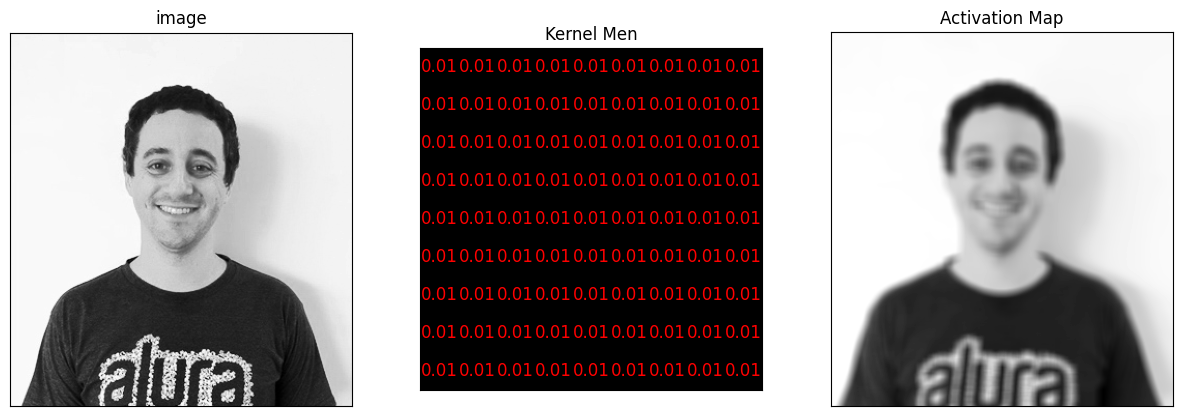

In [52]:
result = convolve(img, kernel_men, mode = 'valid')
show(img, kernel_men, result, 'Kernel Men')

## Sobel Filters

In [53]:
sovel_v = np.zeros((3, 3))
sovel_v[:, 0] = -1
sovel_v[:, 1] = 1
sovel_v[1, [0, 2]] = [-2, 2]
sovel_v

array([[-1.,  1.,  0.],
       [-2.,  1.,  2.],
       [-1.,  1.,  0.]])

In [54]:
sovel_h = np.zeros((3, 3))
sovel_h[0, :] = -1
sovel_h[2, :] = 1
sovel_h[[0, 2], 1] = [-2, 2]
sovel_h

array([[-1., -2., -1.],
       [ 0.,  0.,  0.],
       [ 1.,  2.,  1.]])

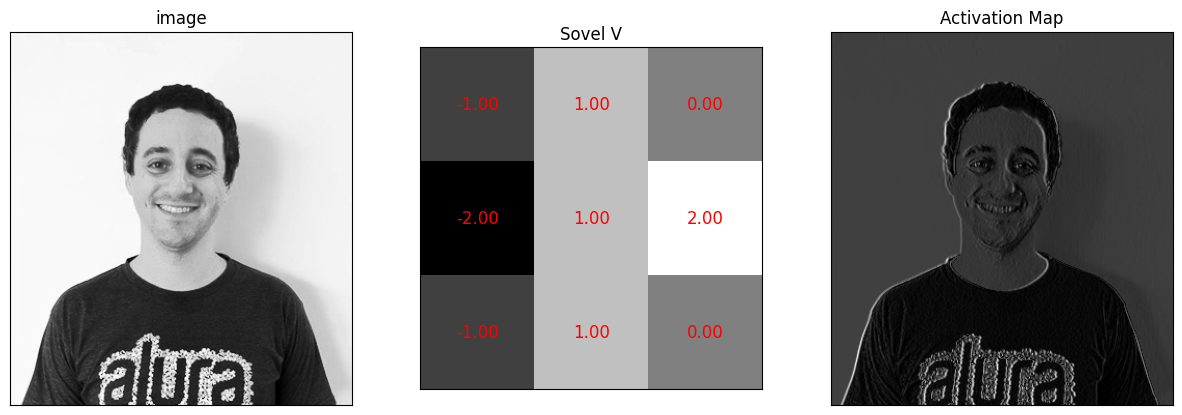

In [55]:
result = convolve(img, sovel_v, mode = 'valid')
show(img, sovel_v, np.abs(result), 'Sovel V')

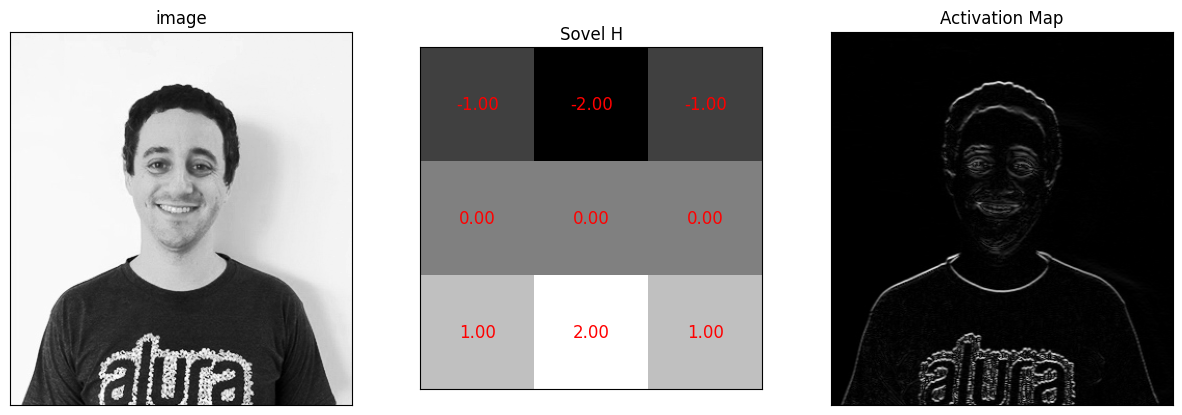

In [56]:
result = convolve(img, sovel_h, mode = 'valid')
show(img, sovel_h, np.abs(result), 'Sovel H')

## Kernel Laplace

In [57]:
laplace = np.ones((3, 3)) * -1
laplace

array([[-1., -1., -1.],
       [-1., -1., -1.],
       [-1., -1., -1.]])

In [58]:
laplace[1, 1] = 8
laplace

array([[-1., -1., -1.],
       [-1.,  8., -1.],
       [-1., -1., -1.]])

In [59]:
result = convolve(img, laplace, mode = 'valid')

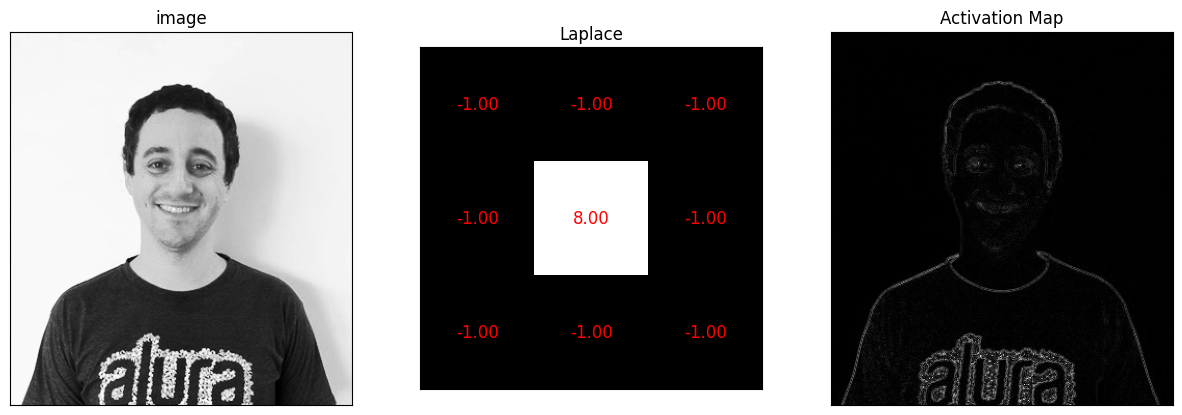

In [60]:
show(img, laplace, np.abs(result), 'Laplace')

## Convolutions and complex patterns

In [61]:
! wget https://www.dropbox.com/s/0nrix9eknyybuqk/image_2007_000032.jpg?dl=0

--2024-04-15 19:49:58--  https://www.dropbox.com/s/0nrix9eknyybuqk/image_2007_000032.jpg?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/0nrix9eknyybuqk/image_2007_000032.jpg [following]
--2024-04-15 19:49:58--  https://www.dropbox.com/s/raw/0nrix9eknyybuqk/image_2007_000032.jpg
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc879708facd6dd537c41400cc88.dl.dropboxusercontent.com/cd/0/inline/CRFuOcdYfMqcgJ2TlIlaHWmzWrY4yK8F2kMGUZh7NtqSkcnGviNSOfDOqz8SrS-ZYhw8Irqzg5WcSO208eTfbDbxV1uljc__rWHHn7q84l-vmt5QVhVJA37kQoghutI8ZSI/file# [following]
--2024-04-15 19:49:58--  https://uc879708facd6dd537c41400cc88.dl.dropboxusercontent.com/cd/0/inline/CRFuOcdYfMqcgJ2TlIlaHWmzWrY4yK8F2kMGUZh7NtqSkcnGviNSOfDOqz8SrS-ZYhw8Irqzg5WcSO208eTfbDbxV1u

In [62]:
! mv image_2007_000032.jpg?dl=0 plane.jpg

In [63]:
img = io.imread('plane.jpg')

array([[[131, 193, 208],
        [131, 193, 208],
        [131, 193, 208],
        ...,
        [182, 232, 241],
        [182, 232, 241],
        [182, 232, 241]],

       [[132, 194, 209],
        [132, 194, 209],
        [133, 195, 210],
        ...,
        [183, 233, 242],
        [183, 233, 242],
        [182, 232, 241]],

       [[133, 195, 210],
        [133, 195, 210],
        [134, 196, 211],
        ...,
        [183, 233, 242],
        [183, 233, 242],
        [182, 232, 241]],

       ...,

       [[  6,  15,  14],
        [  5,  14,  13],
        [  7,  13,  13],
        ...,
        [ 16,  34,  38],
        [ 16,  34,  38],
        [ 16,  34,  38]],

       [[  5,  14,  13],
        [  9,  18,  17],
        [ 12,  17,  20],
        ...,
        [ 16,  34,  38],
        [ 17,  35,  39],
        [ 17,  35,  39]],

       [[  5,  15,  14],
        [  6,  16,  15],
        [ 10,  18,  20],
        ...,
        [ 16,  33,  40],
        [ 12,  29,  36],
        [ 17,  34,  41]]], dtype=uint8)
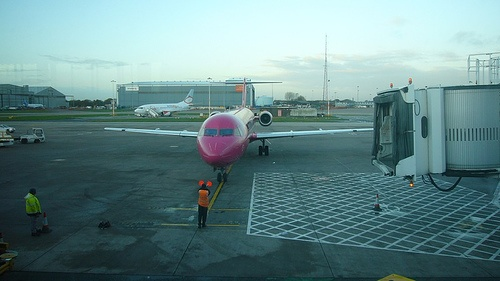

In [64]:
img

In [65]:
# Image shape
print(img.shape)

(281, 500, 3)


In [67]:
img  = img[:, :, 0]

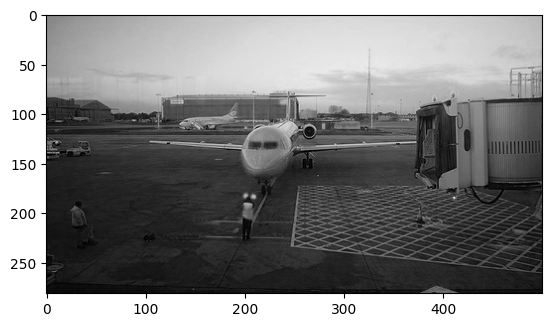

In [68]:
fig, ax = plt.subplots()
ax.imshow(img, cmap = 'gray')

In [69]:
# Rectangle
rectangle = [109, 129, 255, 275]

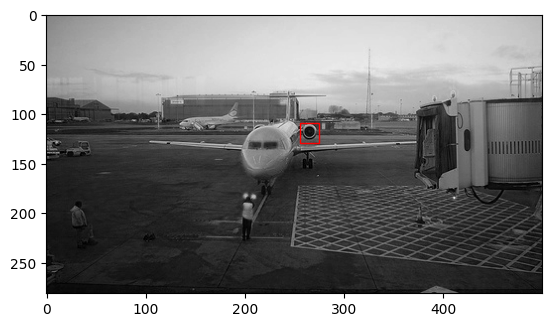

In [70]:
fig, ax = plt.subplots()
ax.imshow(img, cmap = 'gray')
ax.add_patch(patches.Rectangle(
    (rectangle[2], rectangle[0]),
    (rectangle[3] - rectangle[2]),
    (rectangle[1] - rectangle[0]),
    color = 'red', fill  = False
))

In [71]:
patch = img[rectangle[0] : rectangle[1], rectangle[2] : rectangle[3]]
patch = patch - patch.mean()

In [72]:
patch = np.flip(patch)

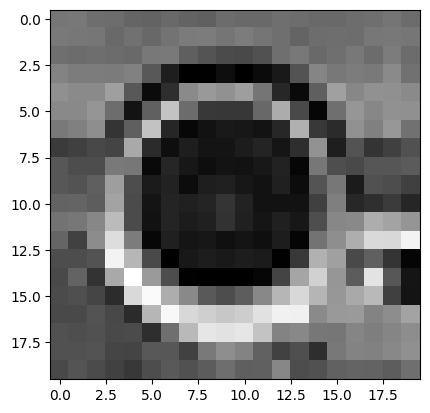

In [73]:
plt.imshow(patch, cmap = 'gray')

In [74]:
result = convolve(img, patch, mode = 'same')

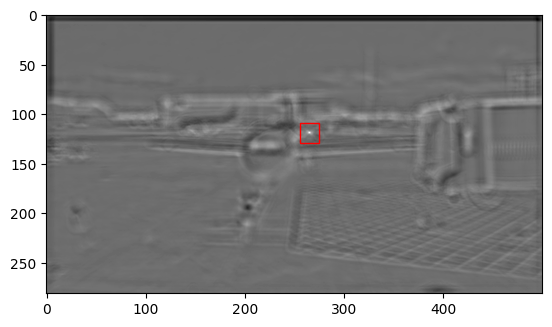

In [75]:
fig, ax = plt.subplots()
ax.imshow(result, cmap = 'gray')
ax.add_patch(patches.Rectangle(
    (rectangle[2], rectangle[0]),
    (rectangle[3] - rectangle[2]),
    (rectangle[1] - rectangle[0]),
    color = 'red', fill  = False
))